In [1]:
import sys
sys.path.append('./code')
from importlib import reload

In [2]:
from config import row_colors, columns_to_names, row_colors_dict

In [3]:
import make_figure4
reload(make_figure4)
from make_figure4 import *
import pickle
from config import load_pileup_variables

(goodinds, merged_clustdict, merged_inds_to_subset, 
    cooldict_50kb, ind_to_gene, all_ind_to_region, my_treg_comp) = load_pileup_variables()

In [165]:
%load_ext autoreload
%autoreload
import scanpy as sc

sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
plt.rcParams['axes.axisbelow'] = True

In [5]:
from initialize import *
import cooler 

treg_250kb = cooler.Cooler('./Treg_all.mcool::/resolutions/250000')
treg_50kb = cooler.Cooler('./Treg_all.mcool::/resolutions/50000')


(chromsizes, parsed_chroms, region_to_inds, 
    all_region_to_ind, inds_to_region, all_ind_to_region, 
    chrom_to_start, chrom_to_end) = initialize_helper_vars(treg_250kb)

In [6]:
gene_to_ind = pickle.load(open('gene_to_ind.p', 'rb'))

In [11]:
all_intra_treg_metadomains = np.load('intermediate_files/all_intra_treg_metadomains.npy')
all_intra_tcon_metadomains = np.load('intermediate_files/all_intra_tcon_metadomains.npy')

all_inter_treg_metadomains = np.load('intermediate_files/all_inter_treg_metadomains.npy')
all_inter_tcon_metadomains = np.load('intermediate_files/all_inter_tcon_metadomains.npy')

In [12]:
bw_val_df_all_250kb = pd.read_csv('./intermediate_files/bw_vals_250kb.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# bins: 5655


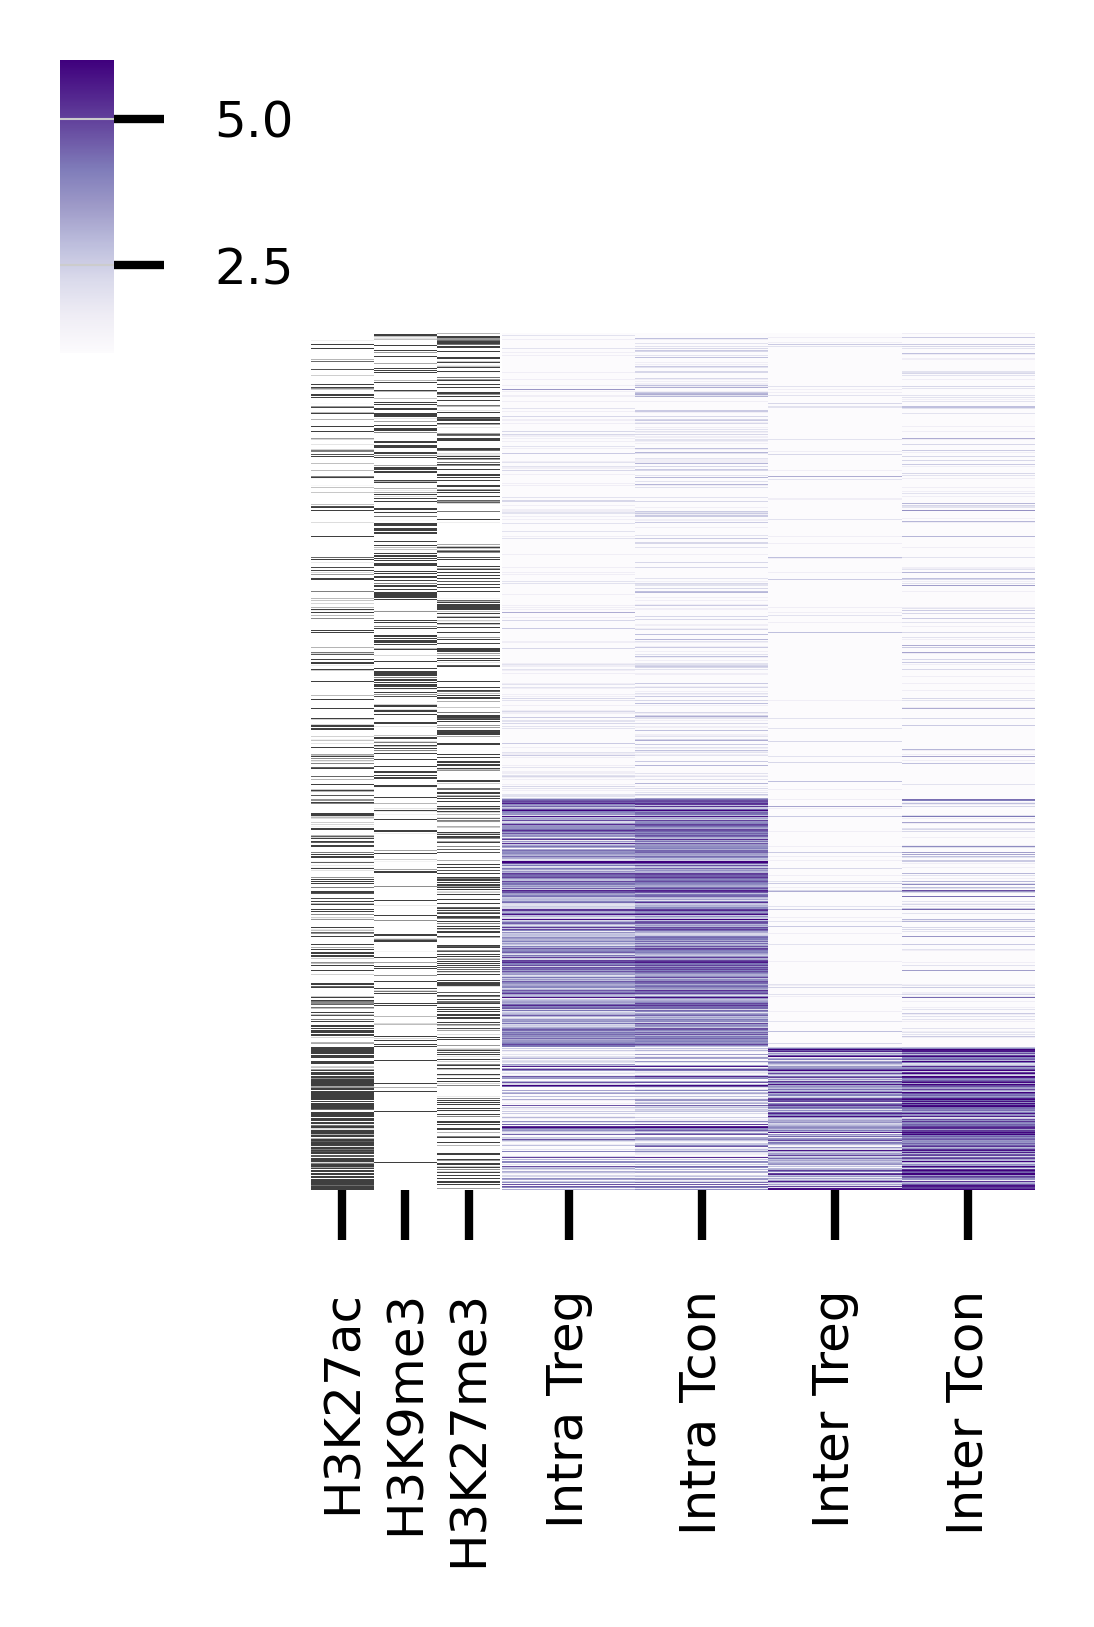

In [37]:
%load_ext autoreload
from main_figures_plotting_functions import intra_inter_metadomain_clustering

(_, clust, result) = intra_inter_metadomain_clustering(all_intra_treg_metadomains, all_inter_treg_metadomains, 
                                  all_intra_tcon_metadomains, all_inter_tcon_metadomains, 
                                  bw_val_df_all_250kb, k=3)

In [69]:
result['cluster'] = clust
data1 = pd.DataFrame([all_ind_to_region[x] for x in result.index[result['cluster'] == 1]],
            columns = ['chrom', 'start', 'end'])
data1['ind'] = result.index[result['cluster'] == 1]
data1['cluster'] = 1
data2 = pd.DataFrame([all_ind_to_region[x] for x in result.index[result['cluster'] == 2]],
            columns = ['chrom', 'start', 'end'])
data2['ind'] = result.index[result['cluster'] == 2]
data2['cluster'] = 2
data = pd.concat([data1, data2], axis=0).reset_index()

In [77]:
%autoreload 2
from collections import defaultdict
from make_figure4 import *
import itertools
from hub_pileup import *
from compute_differential_hic_hub import *

our_treg_25kb = cooler.Cooler('./Treg_all.mcool::/resolutions/25000')
metadomain_pileup_cooldict = {
    'Our_Treg' : our_treg_25kb,
}

intra_mat_dict = defaultdict(list)
intra_metadata = []
padding_size = 30

intra_all_mat_dict, intra_all_metadata = pileup_bins_with_hub(data, metadomain_pileup_cooldict, 
                                                              {x : y for x, y in chrom_to_start.items()}, 
                                                              None, 
                                                              None, 
                                                              skip_metadomains=True,
                                                              padding_size=padding_size, 
                                                              fetch_oe=True,
                                                              resolution_out = 25_000,
                                                              intra=True,
                                                              inter=False
                                                                )

/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 1


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 10


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 11


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 12


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 13


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 14


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 15


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 16


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 17


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 18


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 19


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 2


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 3


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 4


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 5


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 6


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 7


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 8


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with 9


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with X


In [88]:
columns_to_names = {
        1: 'intra_cluster',
        2: 'inter_cluster',
    }

In [100]:
plot_cluster_pileups_from_result

<function hub_pileup.plot_cluster_pileups_from_result(key, mat_dict, metadata, clusters, res=50000, columns_to_names={}, row_colors_dict={}, vmin=0.5, vmax=1, s1=0, s2=-1, center_method='center_only', center=2, show_filts=False, fgsz=(0.7874015748031495, 0.7874015748031495), log=False, cross_plot=True, xspace=1.2, cliplo=-1, cliphigh=10, delta_co=0)>

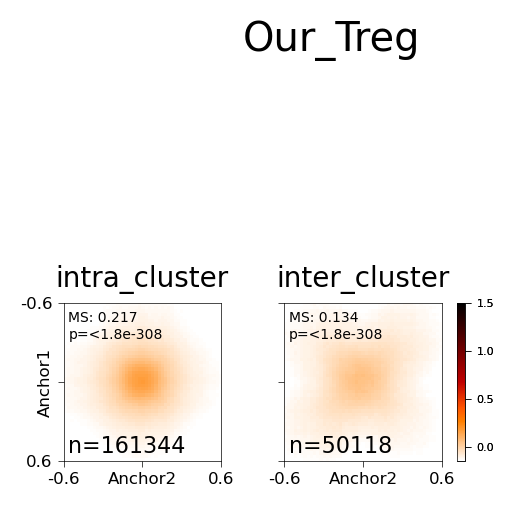

In [186]:
%autoreload 2
from hub_pileup import *

newline = '\n'
all_results_dicts_intra = {}
for key in intra_all_mat_dict:
    (fig_within_cluster), results = plot_cluster_pileups_from_result(key, intra_all_mat_dict, intra_all_metadata,
                                     sorted(intra_all_metadata['cluster1'].unique()),
                                     res = 25_000,
                                     vmax = 1.5,
                                     vmin = -.15,
                                     columns_to_names = columns_to_names,
                                     row_colors_dict  = row_colors_dict,
                                     center = 5, cross_plot = False, s2 = -1,
                                     s1 = 6, xspace=1.4, show_filts=False, center_method = 'none',
                                     
                                    )
    fig_within_cluster = fig_within_cluster[0]
    fig_within_cluster.suptitle(f"{key}", y=4, x=1.7, ha='center')
    fig_within_cluster.savefig(f'./plots/paper/s14/{key}_intrachromosomal.pdf', bbox_inches='tight')
    all_results_dicts_intra[key] = results

In [81]:
inter_all_mat_dict, inter_all_metadata = pileup_bins_with_hub(data, metadomain_pileup_cooldict, 
                                                              {x : y for x, y in chrom_to_start.items()}, 
                                                              None, 
                                                              None, 
                                                              skip_metadomains=True,
                                                              padding_size=padding_size, 
                                                              fetch_oe=True,
                                                              resolution_out = 25_000,
                                                              intra=False,
                                                              inter=True
                                                                )

Done with 10
Done with 11
Done with 11
Done with 12
Done with 12
Done with 12
Done with 13
Done with 13
Done with 13
Done with 13
Done with 14
Done with 14
Done with 14
Done with 14
Done with 14
Done with 15
Done with 15
Done with 15
Done with 15
Done with 15
Done with 15
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 16
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 17
Done with 18
Done with 18
Done with 18
Done with 18
Done with 18
Done with 18
Done with 18
Done with 18
Done with 18
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 19
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 2
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with 3
Done with

In [193]:
plt.rcParams['svg.fonttype'] = 'none'
fig_within_cluster.savefig(f'./plots/paper/s14/{key}_interchromosomal.svg', bbox_inches='tight')

#### Figures S10 J-K

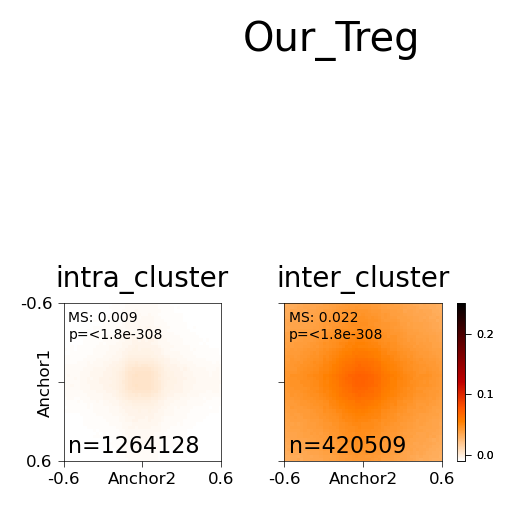

In [188]:
%autoreload 2
from hub_pileup import *

newline = '\n'
all_results_dicts_inter = {}
for key in intra_all_mat_dict:
    (fig_within_cluster), results = plot_cluster_pileups_from_result(key, inter_all_mat_dict, inter_all_metadata,
                                     sorted(intra_all_metadata['cluster1'].unique()),
                                     res = 25_000,
                                     vmax = .25,
                                     vmin = -.01,
                                     columns_to_names = columns_to_names,
                                     row_colors_dict = row_colors_dict,
                                     center = 5, cross_plot = False, s2 = -1,
                                     s1 = 6, xspace=1.4, center_method = 'none',
                                    )
    fig_within_cluster = fig_within_cluster[0]
    fig_within_cluster.suptitle(f"{key}", y=4, x=1.7, ha='center')
    fig_within_cluster.savefig(f'./plots/paper/s14/{key}_interchromosomal.svg', bbox_inches='tight')
    all_results_dicts_inter[key] = results

In [153]:

d1 = pd.DataFrame(all_results_dicts_intra['Our_Treg'][1]['v_middle'] - all_results_dicts_intra['Our_Treg'][1]['v_outside'],)
d1['name'] = 'Bins w/ intra MDs'
d2 = pd.DataFrame(all_results_dicts_intra['Our_Treg'][2]['v_middle'] - all_results_dicts_intra['Our_Treg'][2]['v_outside'],)
d2['name'] = 'Bins w/ inter MDs'

intra_data = pd.concat([d1, d2], axis=0)
intra_data['pileup_over'] = 'intrachromosomal'

d1 = pd.DataFrame(all_results_dicts_inter['Our_Treg'][1]['v_middle'] - all_results_dicts_inter['Our_Treg'][1]['v_outside'],)
d1['name'] = 'Bins w/ intra MDs'
d2 = pd.DataFrame(all_results_dicts_inter['Our_Treg'][2]['v_middle'] - all_results_dicts_inter['Our_Treg'][2]['v_outside'],)
d2['name'] = 'Bins w/ inter MDs'

inter_data = pd.concat([d1, d2], axis=0)
inter_data['pileup_over'] = 'interchromosomal'

In [154]:
data = pd.concat([inter_data, intra_data], axis=0)

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


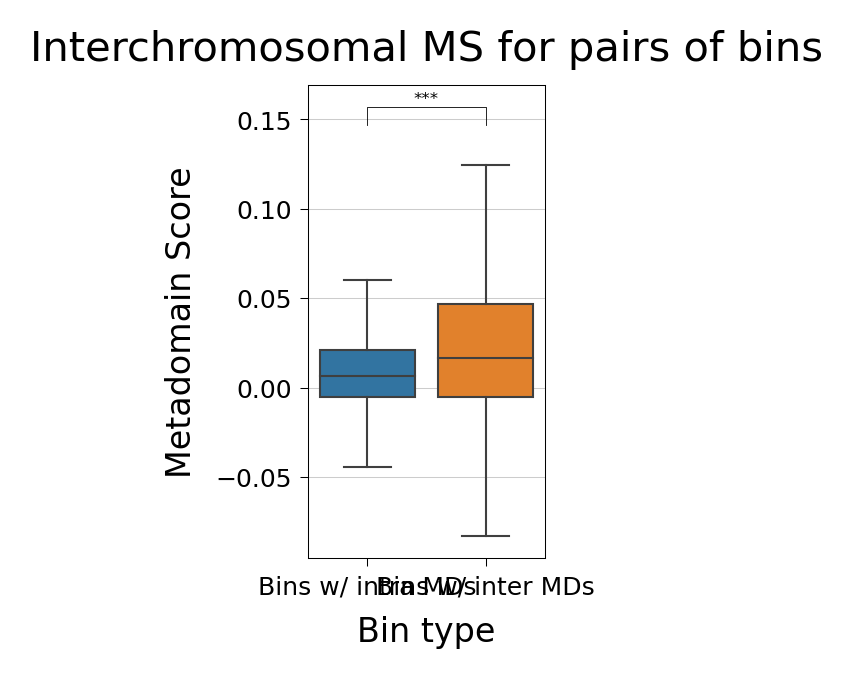

In [194]:
fig, axs = init_subplots_exact(1, 1, fgsz=(20*mm, 40*mm), dpi = 150)
sns.boxplot(data = inter_data,
            x = 'name', y = 0,
            showfliers=False,
           )
add_stat_annotation_boxplot_no_hue(plt.gca(),
                                   data=inter_data,
                                   xcol = 'name', ycol = 0,
                                   order=['Bins w/ intra MDs',
                                         'Bins w/ inter MDs'],
                                   box_pairs = [('Bins w/ intra MDs', 'Bins w/ inter MDs')],
                                   ymax=.12, delta=.05,
                                  )
plt.xlabel("Bin type")
plt.ylabel("Metadomain Score")
plt.title("Interchromosomal MS for pairs of bins")
fig.savefig('./plots/paper/s14/inter_pileup_for_intra_inter_pairs.pdf', bbox_inches='tight',)

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


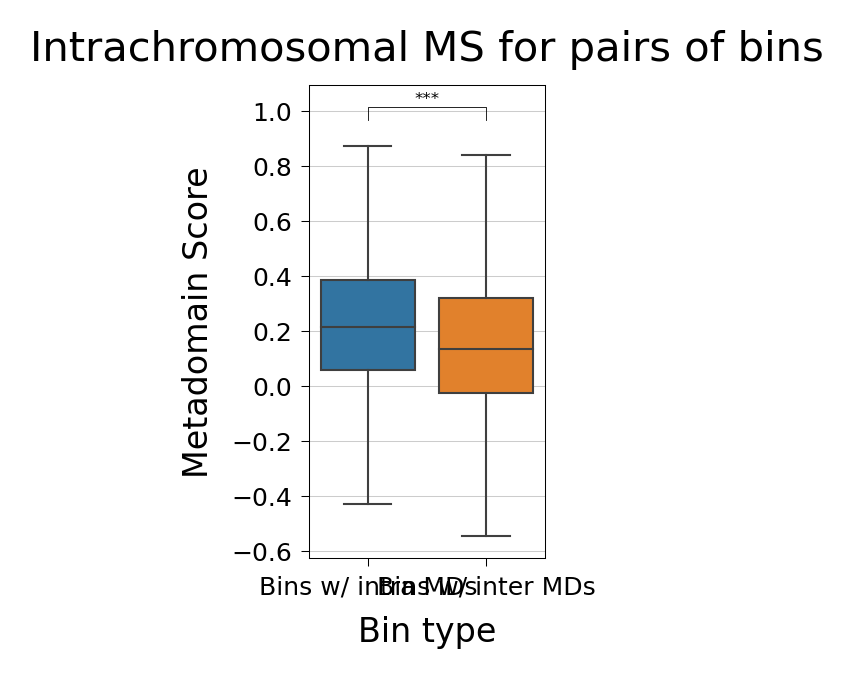

In [195]:
fig, axs = init_subplots_exact(1, 1, fgsz=(20*mm, 40*mm), dpi = 150)
sns.boxplot(data = intra_data,
            x = 'name', y = 0,
            showfliers=False,
           )
add_stat_annotation_boxplot_no_hue(plt.gca(),
                                   data=intra_data,
                                   xcol = 'name', ycol = 0,
                                   order=['Bins w/ intra MDs',
                                         'Bins w/ inter MDs'],
                                   box_pairs = [('Bins w/ intra MDs', 'Bins w/ inter MDs')],
                                   ymax = .9, delta = .05, h = .05,
                                  )
plt.xlabel("Bin type")
plt.ylabel("Metadomain Score")
plt.title("Intrachromosomal MS for pairs of bins")
fig.savefig('./plots/paper/s14/intra_pileup_for_intra_inter_pairs.pdf', bbox_inches='tight')